### 1. Setup and Load Data

#### 1.1 Install Dependencies and Setup

In [1]:
import struct;print(struct.calcsize("P") * 8)

64


In [2]:
import tensorflow as tf 
import os

In [3]:
# Avoid OOM error by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import cv2
import imghdr
import matplotlib.pyplot as plt

C:\Users\bradd\AppData\Local\Temp\ipykernel_17216\2011824555.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


1.2 Remove Dodgy Images

In [6]:
# Reading the data
data_dir = 'data'

In [7]:
# List of all images in happy folder
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '108584594-portrait-of-happy-friends-having-fun-and-making-group-photo-and-smiling.jpg',
 '154006829.jpg',
 '2016-01-04-1451880335-5503640-thedailyhabitsofsupremelyhappypeople.jpg',
 '2560px-Happy_People.jpg',
 '35438_hd.jpg',
 '613k1XcpYCL.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '8cEbMbgxi.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc--baby-essentials-baby-baby.jpg',
 '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'download (1).jpg',
 'download (10).jpg',
 'download (11).jpg',
 'download (12).jpg',
 'download (13).jpg',
 'download (14).jpg',
 'download (15).jpg',
 'download (16).jpg',
 'download (17).jpg',
 'download (18).jpg',
 'download (19).jpg',
 'download (2).jpg',
 'download (21).jpg',
 'download (22).jpg',
 'download (23).jpg',
 'download (24).jpg',


In [8]:
# Image extensions 
image_exts = ['jpeg', 'jpg','bmp', 'png']

In [9]:
img = cv2.imread(os.path.join('data','happy','154006829.jpg'))

In [10]:
img.shape

(3744, 5616, 3)

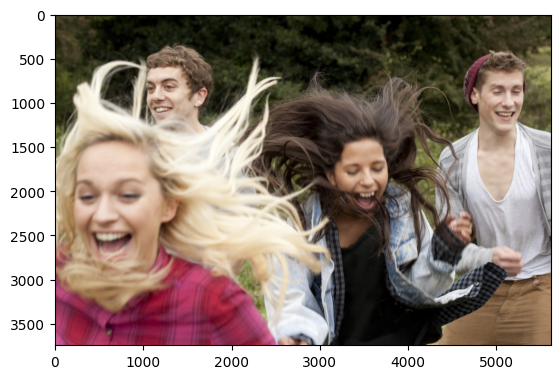

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

#### 1.3 Load Data

In [13]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1115 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

In [19]:
len(batch)

2

In [20]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [21]:
# Resize the images
#tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128,128))

In [22]:
# Class 1 = Sad pple
# Class 0 = Happy pple
batch[1]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

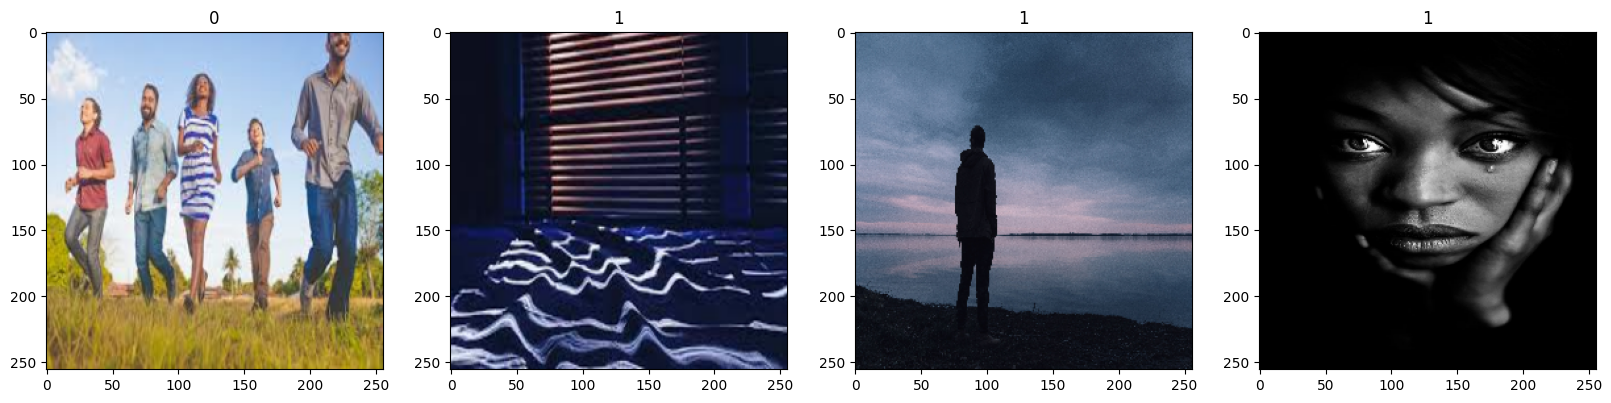

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
print(batch[0].min())
print(batch[0].max())


0.0
255.0


In [25]:
scaled = batch[0]/255

In [26]:
print(scaled.min())
print(scaled.max())

0.0
1.0


### 2.0 Preprocess Data

#### 2.1 Scale Data

In [27]:
data = data.map(lambda X, y: (X/255, y))

In [28]:
scaled_iterator = data.as_numpy_iterator()

In [29]:
batch = scaled_iterator.next()

In [30]:
batch[1].max()

1

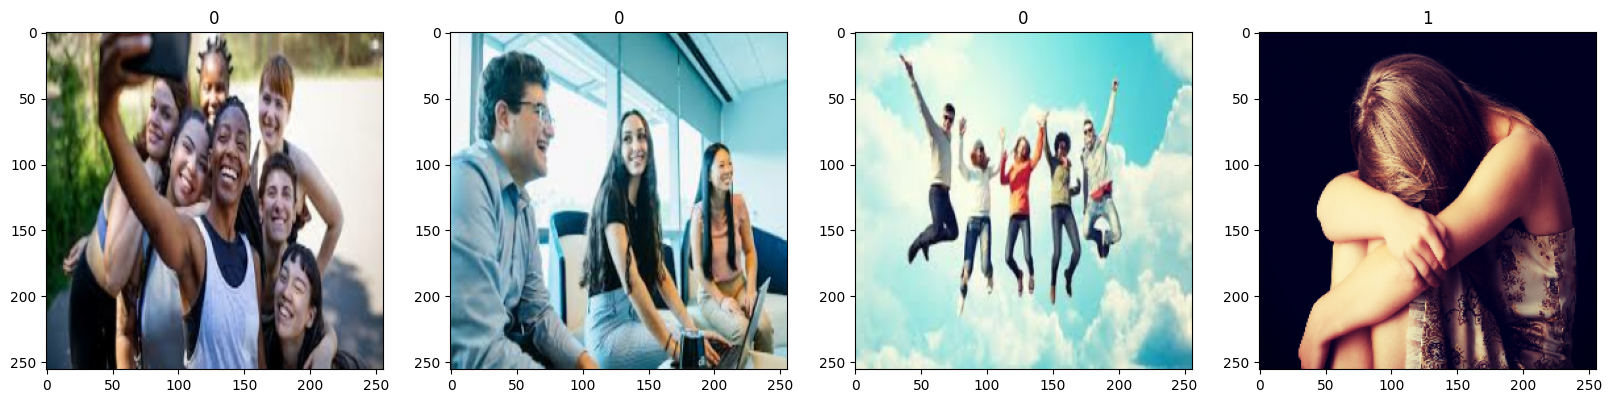

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### 2.2 Split Data

In [32]:
len(data)

35

In [33]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [34]:
print('train_size: {}\n val_size: {}\n test_size: {}'.format(train_size, val_size, test_size))

train_size: 24
 val_size: 8
 test_size: 3


In [35]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [36]:
print('train_size: {}\n val_size: {}\n test_size: {}'.format(len(train), len(val), len(test)))

train_size: 24
 val_size: 8
 test_size: 3


### 3.0 Deep Model

#### 3.1 Build Deep Learning Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

#### 3.2 Train

In [42]:
logdir = 'logs'

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [44]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 153s 6s/step - loss: 0.6755 - accuracy: 0.6315 - val_loss: 0.6367 - val_accuracy: 0.6719
Epoch 2/20
24/24 [==============================] - 157s 6s/step - loss: 0.6275 - accuracy: 0.6706 - val_loss: 0.5918 - val_accuracy: 0.7148
Epoch 3/20
24/24 [==============================] - 136s 6s/step - loss: 0.5897 - accuracy: 0.7161 - val_loss: 0.5821 - val_accuracy: 0.6914
Epoch 4/20
24/24 [==============================] - 152s 6s/step - loss: 0.5189 - accuracy: 0.7604 - val_loss: 0.5199 - val_accuracy: 0.7227
Epoch 5/20
24/24 [==============================] - 145s 6s/step - loss: 0.4581 - accuracy: 0.8021 - val_loss: 0.5234 - val_accuracy: 0.7344
Epoch 6/20
24/24 [==============================] - 147s 6s/step - loss: 0.4434 - accuracy: 0.8151 - val_loss: 0.4809 - val_accuracy: 0.8047
Epoch 7/20
24/24 [==============================] - 141s 6s/step - loss: 0.4010 - accuracy: 0.8346 - val_loss: 0.5198 - val_accuracy: 0.7344
Epoch 8/20
24

In [45]:
# Pickling the model
import pickle

In [54]:
# Writing a Pickle file with the Model
pickle.dump(hist, open('hist.pkl', 'wb'))

In [55]:
pickle.dump(model, open('dlimageclassifier.pkl', 'wb'))

In [57]:
# History 
hist.history

{'loss': [0.6754757761955261,
  0.6275272369384766,
  0.5897154808044434,
  0.5188731551170349,
  0.45807746052742004,
  0.4434450566768646,
  0.40099871158599854,
  0.2988471984863281,
  0.22122736275196075,
  0.14633025228977203,
  0.13429056107997894,
  0.08677522093057632,
  0.0510331392288208,
  0.06275952607393265,
  0.03726568445563316,
  0.019461728632450104,
  0.02322731353342533,
  0.009356855414807796,
  0.010964371263980865,
  0.012489359825849533],
 'accuracy': [0.6315104365348816,
  0.6705729365348816,
  0.7161458134651184,
  0.7604166865348816,
  0.8020833134651184,
  0.8151041865348816,
  0.8346354365348816,
  0.8763020634651184,
  0.91796875,
  0.9440104365348816,
  0.9557291865348816,
  0.9739583134651184,
  0.98828125,
  0.9830729365348816,
  0.98828125,
  0.9947916865348816,
  0.9973958134651184,
  0.9986979365348816,
  0.9973958134651184,
  0.9973958134651184],
 'val_loss': [0.6366732120513916,
  0.5917785167694092,
  0.5821323990821838,
  0.5198627710342407,
  0.5

#### 3.3 Plot Performance 

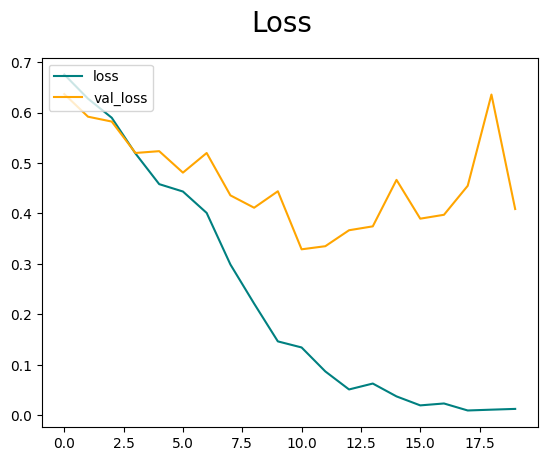

In [58]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

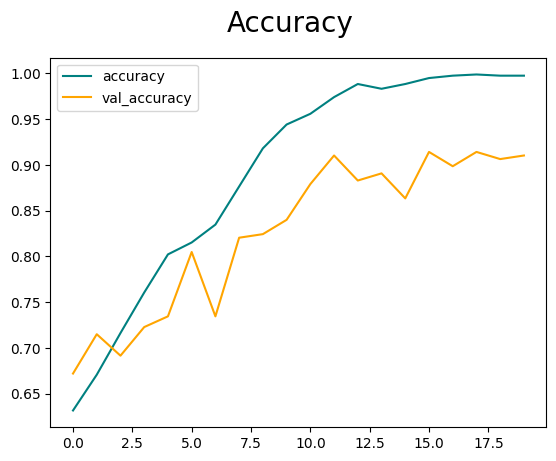

In [59]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### 4.0 Evaluate Performance

#### 4.1 Evaluate 